In [ ]:
import os
import random
import numpy as np
import pandas as pd
import xarray
import matplotlib.pyplot as plt
import seaborn as sns

from src.results.experiments import _DateExperimentLoader
from src.data_loader import Shifted_Data_Loader


In [82]:
def set_style():
    # This sets reasonable defaults for font size for
    # a figure that will go in a paper
    plt.style.use(['seaborn-white', 'seaborn-paper'])    
    
    # Set the font to be serif, rather than sans
    sns.set(font='serif',font_scale=2)
    
    # Make the background white, and specify the
    # specific font family
    sns.set_style("whitegrid", 
                  {"font.family": "sans-serif",
                   "font.serif": ["Arial", "Helvetica"]}
                 )

In [8]:
lg = _DateExperimentLoader('2019-06-04')
lg.load_configs()
configs = pd.DataFrame.from_records(lg.configs)

In [46]:
su_both_df = pd.read_parquet(os.path.join(lg.experiment_root,'su_both_processed.df'))
su_xent_df = pd.read_parquet(os.path.join(lg.experiment_root,'su_xent_processed.df'))
dicarlo_df = pd.read_parquet(os.path.join(lg.experiment_root,'dicarlo.Majaj_processed.df'))


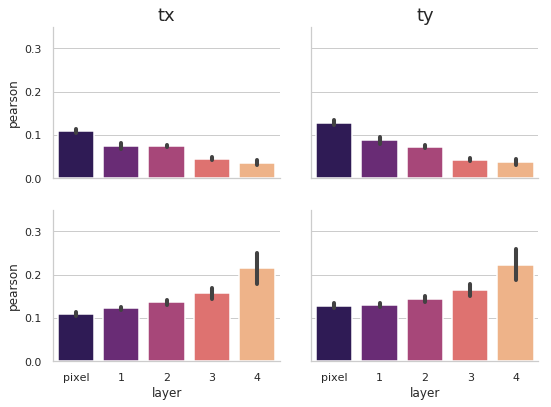

In [29]:
# sns.set(font_scale=2)
set_style()
# sns.set_context('paper')
fig,axs = plt.subplots(2,2,figsize=(8,6),sharex=True,sharey=True,subplot_kw={'ylim':(0,0.35)})

mod_order=np.arange(5)
# mod_order = ['pixel','dense_1','dense_2','dense_3','z_lat','y_lat']

sns.set_context('talk')
properties = ['tx','ty']
for ax_row,df,order in zip(axs,[su_xent_df,su_both_df,],[mod_order,mod_order]): 
    for ax,prop in zip(ax_row,properties):
        sns.barplot(x='layer',y=prop,order=order,data=df,ax=ax,palette='magma')
        sns.despine(ax=ax)
    
    ax_row[1].set_ylabel('')
    ax_row[0].set_ylabel('pearson')
    

for ax in axs[1]:
    ax.set_xticklabels(['pixel','1','2','3','4'])
for ax,prop in zip(axs[0],properties):
    ax.get_xaxis().set_visible(False)
    ax.set_title(prop)

plt.tight_layout()
fig.savefig('./denseNN_pearson.pdf',dpi=300,orientation='landscape')

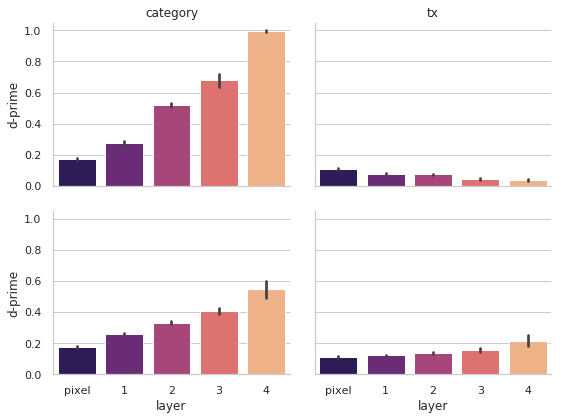

In [62]:
sns.set(font_scale=2)
set_style()
# sns.set_context('paper')
properties = ['category','tx']
fig,axs = plt.subplots(2,len(properties),figsize=(len(properties)*4,6),sharex=True,sharey=True)

mod_order=np.arange(5)
# mod_order = ['pixel','dense_1','dense_2','dense_3','z_lat','y_lat']

# sns.set_context('talk')
for ax_row,df,order in zip(axs,[su_xent_df,su_both_df,],[mod_order,mod_order]): 
    for ax,prop in zip(ax_row,properties):
        sns.barplot(x='layer',y=prop,order=order,data=df,ax=ax,palette='magma')
        sns.despine(ax=ax)
    
    ax_row[1].set_ylabel('')
    ax_row[0].set_ylabel('d-prime')
    

for ax in axs[1]:
    ax.set_xticklabels(['pixel','1','2','3','4'])

for ax,prop in zip(axs[0],properties):
    ax.get_xaxis().set_visible(False)
    ax.set_title(prop)

plt.tight_layout()
fig.savefig('./denseNN_dprime.pdf',dpi=300,orientation='landscape')

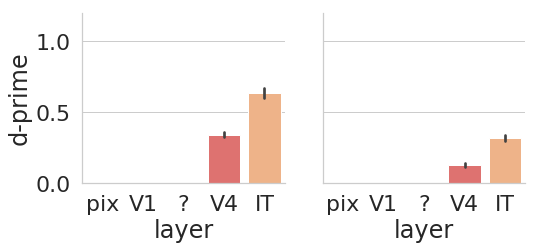

In [161]:
set_style()

def topn_su_decode(df,n,props,prop_labels,**kwargs):
    order=[0,1,2,3,4]
    fig,axs = plt.subplots(1,len(props),figsize=(len(props)*4,4),sharey=True,**kwargs)
#     sns.set_context('talk')
    for i,ax,prop,lab in zip(np.arange(len(props)),axs,props,prop_labels):
        df_topn = pd.concat([df.query('layer == {}'.format(l)).nlargest(n,prop) for l in [3,4]])
        sns.barplot(x='layer',y=prop,order=order,data=df_topn,ax=ax,palette='magma')
        ax.set_xticklabels(['pix','V1','?','V4','IT'])
        ax.set_ylabel(lab)
        sns.despine(ax=ax)
        if i >0:
            ax.set_ylabel('')
    plt.tight_layout()

    
topn_su_decode(dicarlo_df,n=15,props=['category','ty'],prop_labels=['d-prime','pearson'],subplot_kw={'ylim':(0,1.2)})

In [116]:
def plot_kde(x,y,df,by='region',order=None,xlim=(0.0,1.3),ylim=(0.0,1.3)):
    if order is not None:
        subsets = order
    else:
        subsets = df[by].drop_duplicates().values
        
    plot_scale = 5
    fig,axs = plt.subplots(1,len(subsets),figsize=(plot_scale*len(subsets),plot_scale),sharex=True,sharey=True,
                           subplot_kw={
                               'xlim':xlim,
                               'ylim':ylim,
                           })
    
    for ax,sub in zip(axs,subsets):
        sub_df = df.query('{} == "{}"'.format(by,sub))
        sns.kdeplot(sub_df[x],sub_df[y],ax=ax,linewidths=3)
        ax.set_title("{}: {}".format(by,sub))
    
    return fig,axs

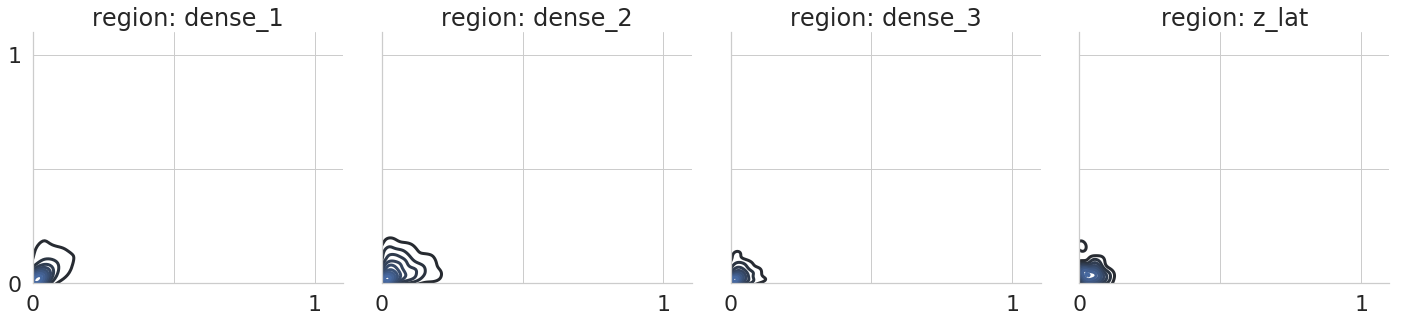

In [350]:
set_style()
fig,axs = plot_kde('tx','ty',su_xent_df,by='region',order=['dense_1','dense_2','dense_3','z_lat'],
                   xlim=(0,1.1),ylim=(0,1.1)
                  )
plt.tight_layout()
sns.despine()
for i,ax in enumerate(axs):
    pass
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_xticklabels([0,'',1])
    ax.set_yticks([0,0.5,1])
    ax.set_yticklabels([0,'',1])
plt.tight_layout()

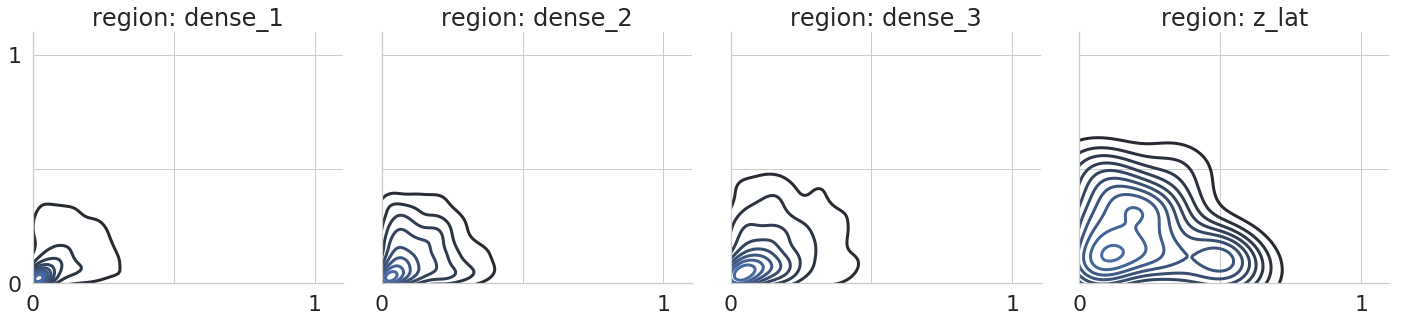

In [352]:
set_style()
fig,axs = plot_kde('tx','ty',su_both_df,by='region',order=['dense_1','dense_2','dense_3','z_lat'],xlim=(0,1.1),ylim=(0,1.1))
plt.tight_layout()
sns.despine(fig=fig)
for i,ax in enumerate(axs):
    pass
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_xticklabels([0,'',1])
    ax.set_yticks([0,0.5,1])
    ax.set_yticklabels([0,'',1])
plt.tight_layout()

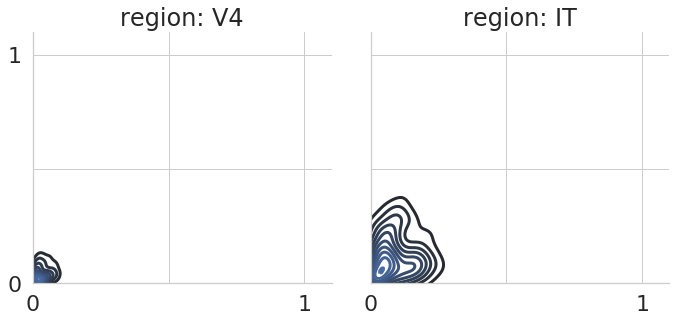

In [353]:
# sns.set(font_scale=2)
set_style()
fig,axs = plot_kde('tx','ty',dicarlo_df,by='region',order=['V4','IT'],xlim=(0,1.1),ylim=(0,1.1))
plt.tight_layout()
sns.despine(fig=fig)
for i,ax in enumerate(axs):
    pass
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_yticks([0,0.5,1])
    ax.set_xticklabels([0,'',1])
    ax.set_yticklabels([0,'',1])
plt.tight_layout()

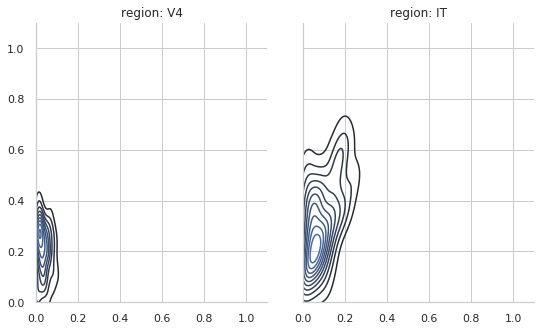

In [51]:
sns.set(font_scale=2)
set_style()
fig,axs = plot_kde('tx','category',dicarlo_df,by='region',order=['V4','IT'],xlim=(0,1.1),ylim=(0,1.1))
plt.tight_layout()
sns.despine(fig=fig)
for i,ax in enumerate(axs):
    pass
    ax.set_ylabel('')
    ax.set_xlabel('')

In [163]:
DL = Shifted_Data_Loader('fashion_mnist',rotation=None,translation=0.6,flatten=False,seed=7)

input_shape:  (56, 56, 1)
dataset:  fashion_mnist
scale:  2
tx_max:  0.6
rot_max:  None
contrast_level:  1
noise_mode:  None


train images:   0%|          | 0/60000 [00:00<?, ?it/s]

sx_train:  (60000, 56, 56, 1)
transforming: 


test_images:  30%|██▉       | 2991/10000 [00:00<00:00, 29905.32it/s]

making testing data...


test_images: 100%|██████████| 10000/10000 [00:00<00:00, 30838.86it/s]


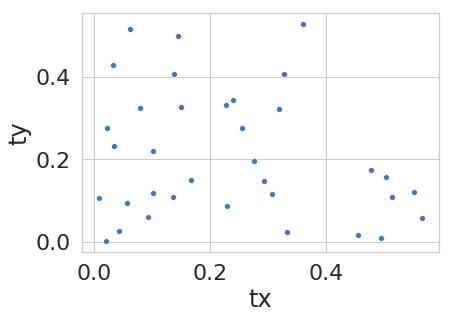

In [172]:
sns.scatterplot('tx','ty',data=su_both_df.query('region == "z_lat"'))

In [406]:
tx_candidates = su_both_df.query('region == "z_lat" & tx > 0.4 & ty < 0.2')
ty_candidates = su_both_df.query('region == "z_lat" & tx < 0.2 & ty > 0.4')
all_z = su_both_df.query('region == "z_lat"')

In [262]:
ty_candidates

,region,layer,tx,ty,norm_ty,category,unit_id
7373,z_lat,4,0.145063,0.500898,0.500898,0.857142,z_lat_18
7376,z_lat,4,0.061993,0.518399,0.518399,0.438876,z_lat_20
7380,z_lat,4,0.031722,0.429682,0.429682,0.497892,z_lat_24
7387,z_lat,4,0.138191,0.407833,0.407833,0.677063,z_lat_30


In [165]:
lg = _DateExperimentLoader('2019-06-04')
lg.load_configs()
configs = pd.DataFrame.from_records(lg.configs)

In [168]:
lg_recon = lg.load_assemblies(subset=[10,11,12])

In [268]:
shifts = lg_recon[0].sel(region='z_lat')['presentation'].to_dataframe(name='df').reset_index()[['numeric_label','object_name','dx','dy','tx','ty']]

def get_values(da,neuroids,region='z_lat'):
    n_df = {nid:np.squeeze(da.sel(region=region,neuroid_id=nid).values) for nid in neuroids}
    return pd.DataFrame.from_records(n_df)

In [413]:
all_z = lg_recon[0].sel(region='z_lat').values

In [263]:
xn = get_values(lg_recon[0],tx_candidates.unit_id.values,region='z_lat')
yn = get_values(lg_recon[0],ty_candidates.unit_id.values,region='z_lat')
# yn = lg_recon[0].sel(neuroid_id='z_lat_18')

# act = np.concatenate([xn.values,yn.values],axis=1)

/home/elijahc/.pyenv/versions/fastai/lib/python3.6/site-packages/xarray/core/dataset.py:2232: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  index = pd.MultiIndex(v.levels, v.labels, v.sortorder,


In [378]:
from sklearn.manifold import TSNE, LocallyLinearEmbedding, Isomap
tsne_embedder = TSNE()
isomap_embedder = Isomap(n_jobs=5)

In [264]:
all_xy = pd.concat([xn,yn],axis=1)

In [359]:
all_xy.values.shape

(10000, 11)

In [362]:
tsne_out = tsne_embedder.fit_transform(all_xy.values)

In [414]:
isomap_out = isomap_embedder.fit_transform(all_z)

/home/elijahc/.pyenv/versions/fastai/lib/python3.6/site-packages/sklearn/utils/extmath.py:516: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


In [395]:
embed_lle = LocallyLinearEmbedding(n_jobs=5)
lle_out = embed_lle.fit_transform(all_xy.values)

In [415]:
tsne_df = pd.DataFrame(tsne_out,columns=['tsne_1','tsne_2'])
isomap_df = pd.DataFrame(isomap_out,columns=['isomap_1','isomap_2'])
lle_df = pd.DataFrame(lle_out,columns=['dim_1','dim_2'])
lle_df['dx']=shifts_df.dx
lle_df['dy']=shifts_df.dy
tsne_df['dx']=shifts_df.dx
isomap_df['dx']=shifts_df.dx
tsne_df['dy']=shifts_df.dy
isomap_df['dy']=shifts_df.dy

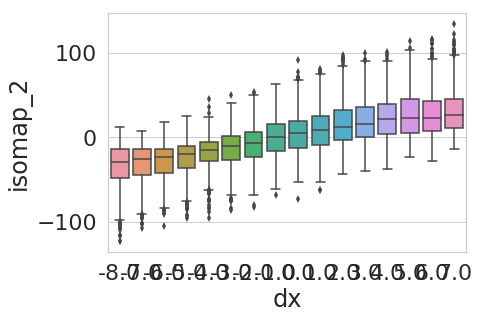

In [418]:
sns.boxplot(x='dx',y='isomap_2',data=isomap_df)

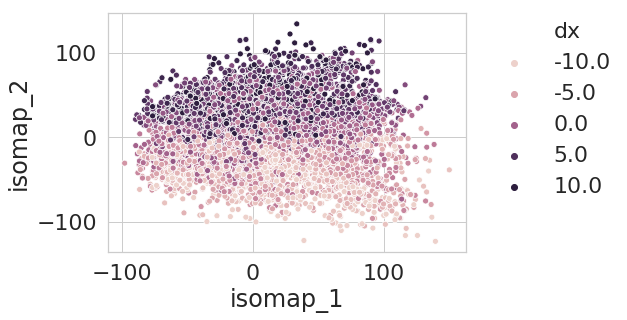

In [432]:
sns.scatterplot(x='isomap_1',y='isomap_2',hue='dx',data=isomap_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# axs[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

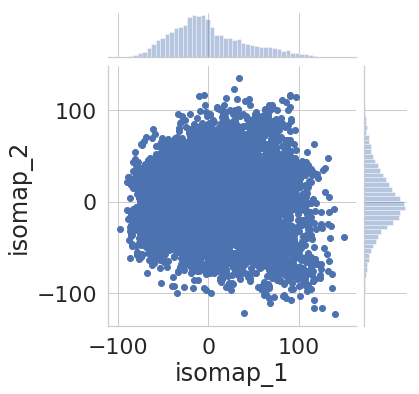

In [430]:
sns.jointplot(x='isomap_1',y='isomap_2',data=isomap_df)

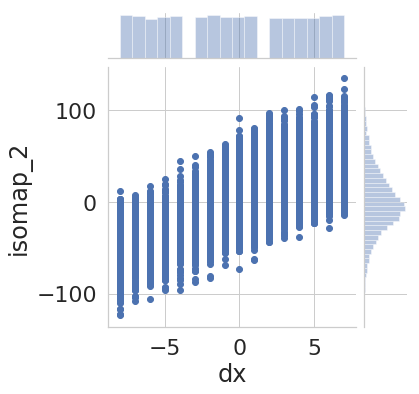

In [429]:
sns.jointplot(x='dx',y='isomap_2',data=isomap_df,
#              x_jitter=0.3,
             )

In [337]:
def translation_pair_plot(x,y,xy_df,shifts):
    trx_df = pd.concat([xy_df[[x,y]],shifts[['dx','dy','tx','ty']]],axis=1)
    fig,axs = plt.subplots(2,1,figsize=(4,8),sharex=True,sharey=True)
    sns.scatterplot(x=x,y=y,hue='dx',data=trx_df,legend='brief',palette='plasma',ax=axs[0])
    sns.scatterplot(x=x,y=y,hue='dy',data=trx_df,legend='brief',palette='plasma',ax=axs[1])
    axs[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    axs[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    return None

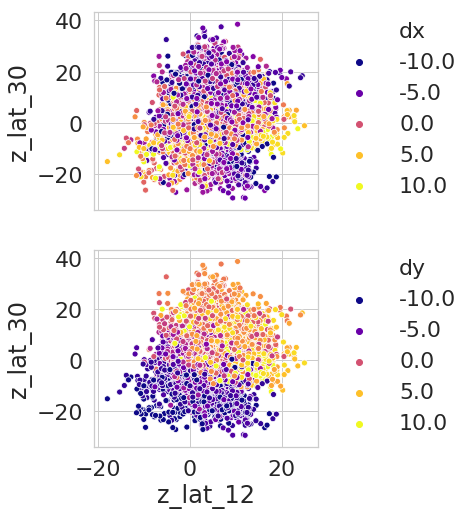

In [349]:
idx = 0
translation_pair_plot(tx_candidates.iloc[idx].unit_id,ty_candidates.iloc[3].unit_id,all_xy,shifts)

In [ ]:
sns.

In [255]:
shifts_df = pd.concat([shifts,xn,yn],axis=1)

In [256]:
sns.scatterplot(x='z_lat_12',y='z_lat_18',hue='ty',data=shifts_df,palette='viridis',legend=None)

ValueError: Could not interpret input 'z_lat_18'